In [1]:
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from matplotlib import pyplot as plt
from matplotlib import cm,colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy as sp
from scipy.spatial import cKDTree
import pickle
from donutlib.decamutil import decaminfo
from scriptUtil import decodeNumberList

from pixmappy import DESMaps, Gnomonic, GalSimWCS
from meshutil import mkDonutAnaDF

PointMesh: Could not load ROOT
donutana: could not import ROOT


In [3]:
# get Meshes and a DonutAna object - but set nInterpGrid to 128 (usually just 32)
dfDirectory = "/u/ec/roodman/Astrophysics/Donuts/ComboMeshesZemaxIteration2v22"
dfName = "ComboMesh_Science-20140212s2-v22i2_All"
zVarPattern="z%dcorr"
usedFlag=True
minDict={4:-20.,5:-0.2,6:-0.2,7:-0.125,8:-0.125,9:-0.3,10:-0.3,11:-0.15,14:-0.1,15:-0.1}
maxDict={4:20.,5:0.2,6:0.2,7:0.125,8:0.125,9:0.3,10:0.3,11:0.15,14:0.1,15:0.1}

iZs = [4]
da = mkDonutAnaDF(dfDirectory+"/"+dfName+".pkl",iZs,zVarPattern=zVarPattern,sensorSet="ScienceOnly",method="idw",methodVal=(250,1.0),nInterpGrid=128,donutCutString="flagFinal==True")
        
for iZ in iZs:
    print(iZ)
    meshN = "z%dMesh" % (iZ)
    if meshN in da.meshDict:
        aMesh = da.meshDict[meshN]
        X_all,Y_all,Xcen_all,Ycen_all,Z_all,ZVig_all = aMesh.calcMeshMPL2D()




4


In [4]:
ccdnames = da.meshDict['z4Mesh'].coordList

In [6]:
# run jobs...
# submit jobs to make PixelSize3
import os
for ccdname in ccdnames:
    command = "bsub -C 0  -W 1:00 -R select[rhel60] -o %s.log ./calcPixelSize.py -c %s -o %s.pkl" % (ccdname,ccdname,ccdname)
    os.system(command)
    print(command)

bsub -C 0  -W 1:00 -R select[rhel60] -o S1.log ./calcPixelSize.py -c S1 -o S1.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S2.log ./calcPixelSize.py -c S2 -o S2.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S3.log ./calcPixelSize.py -c S3 -o S3.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S4.log ./calcPixelSize.py -c S4 -o S4.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S5.log ./calcPixelSize.py -c S5 -o S5.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S6.log ./calcPixelSize.py -c S6 -o S6.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S7.log ./calcPixelSize.py -c S7 -o S7.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S8.log ./calcPixelSize.py -c S8 -o S8.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S9.log ./calcPixelSize.py -c S9 -o S9.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S10.log ./calcPixelSize.py -c S10 -o S10.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S11.log ./calcPixelSize.py -c S11 -o S11.pkl
bsub -C 0  -W 1:00 -R select[rhel60] -o S12.log ./calcPixelSize.py -c S12 -o S12.pkl
bsub -C

In [10]:
# load the pickles
import pickle
PixelSize_all = {}
for ccdname in ccdnames:
    try:
        d = pickle.load(open('%s.pkl' % (ccdname),'rb'))
        PixelSize_all[ccdname] = d[ccdname]
    except:
        print(ccdname)

N30


In [11]:
print(PixelSize_all.keys())

dict_keys(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N31'])


<IPython.core.display.Javascript object>


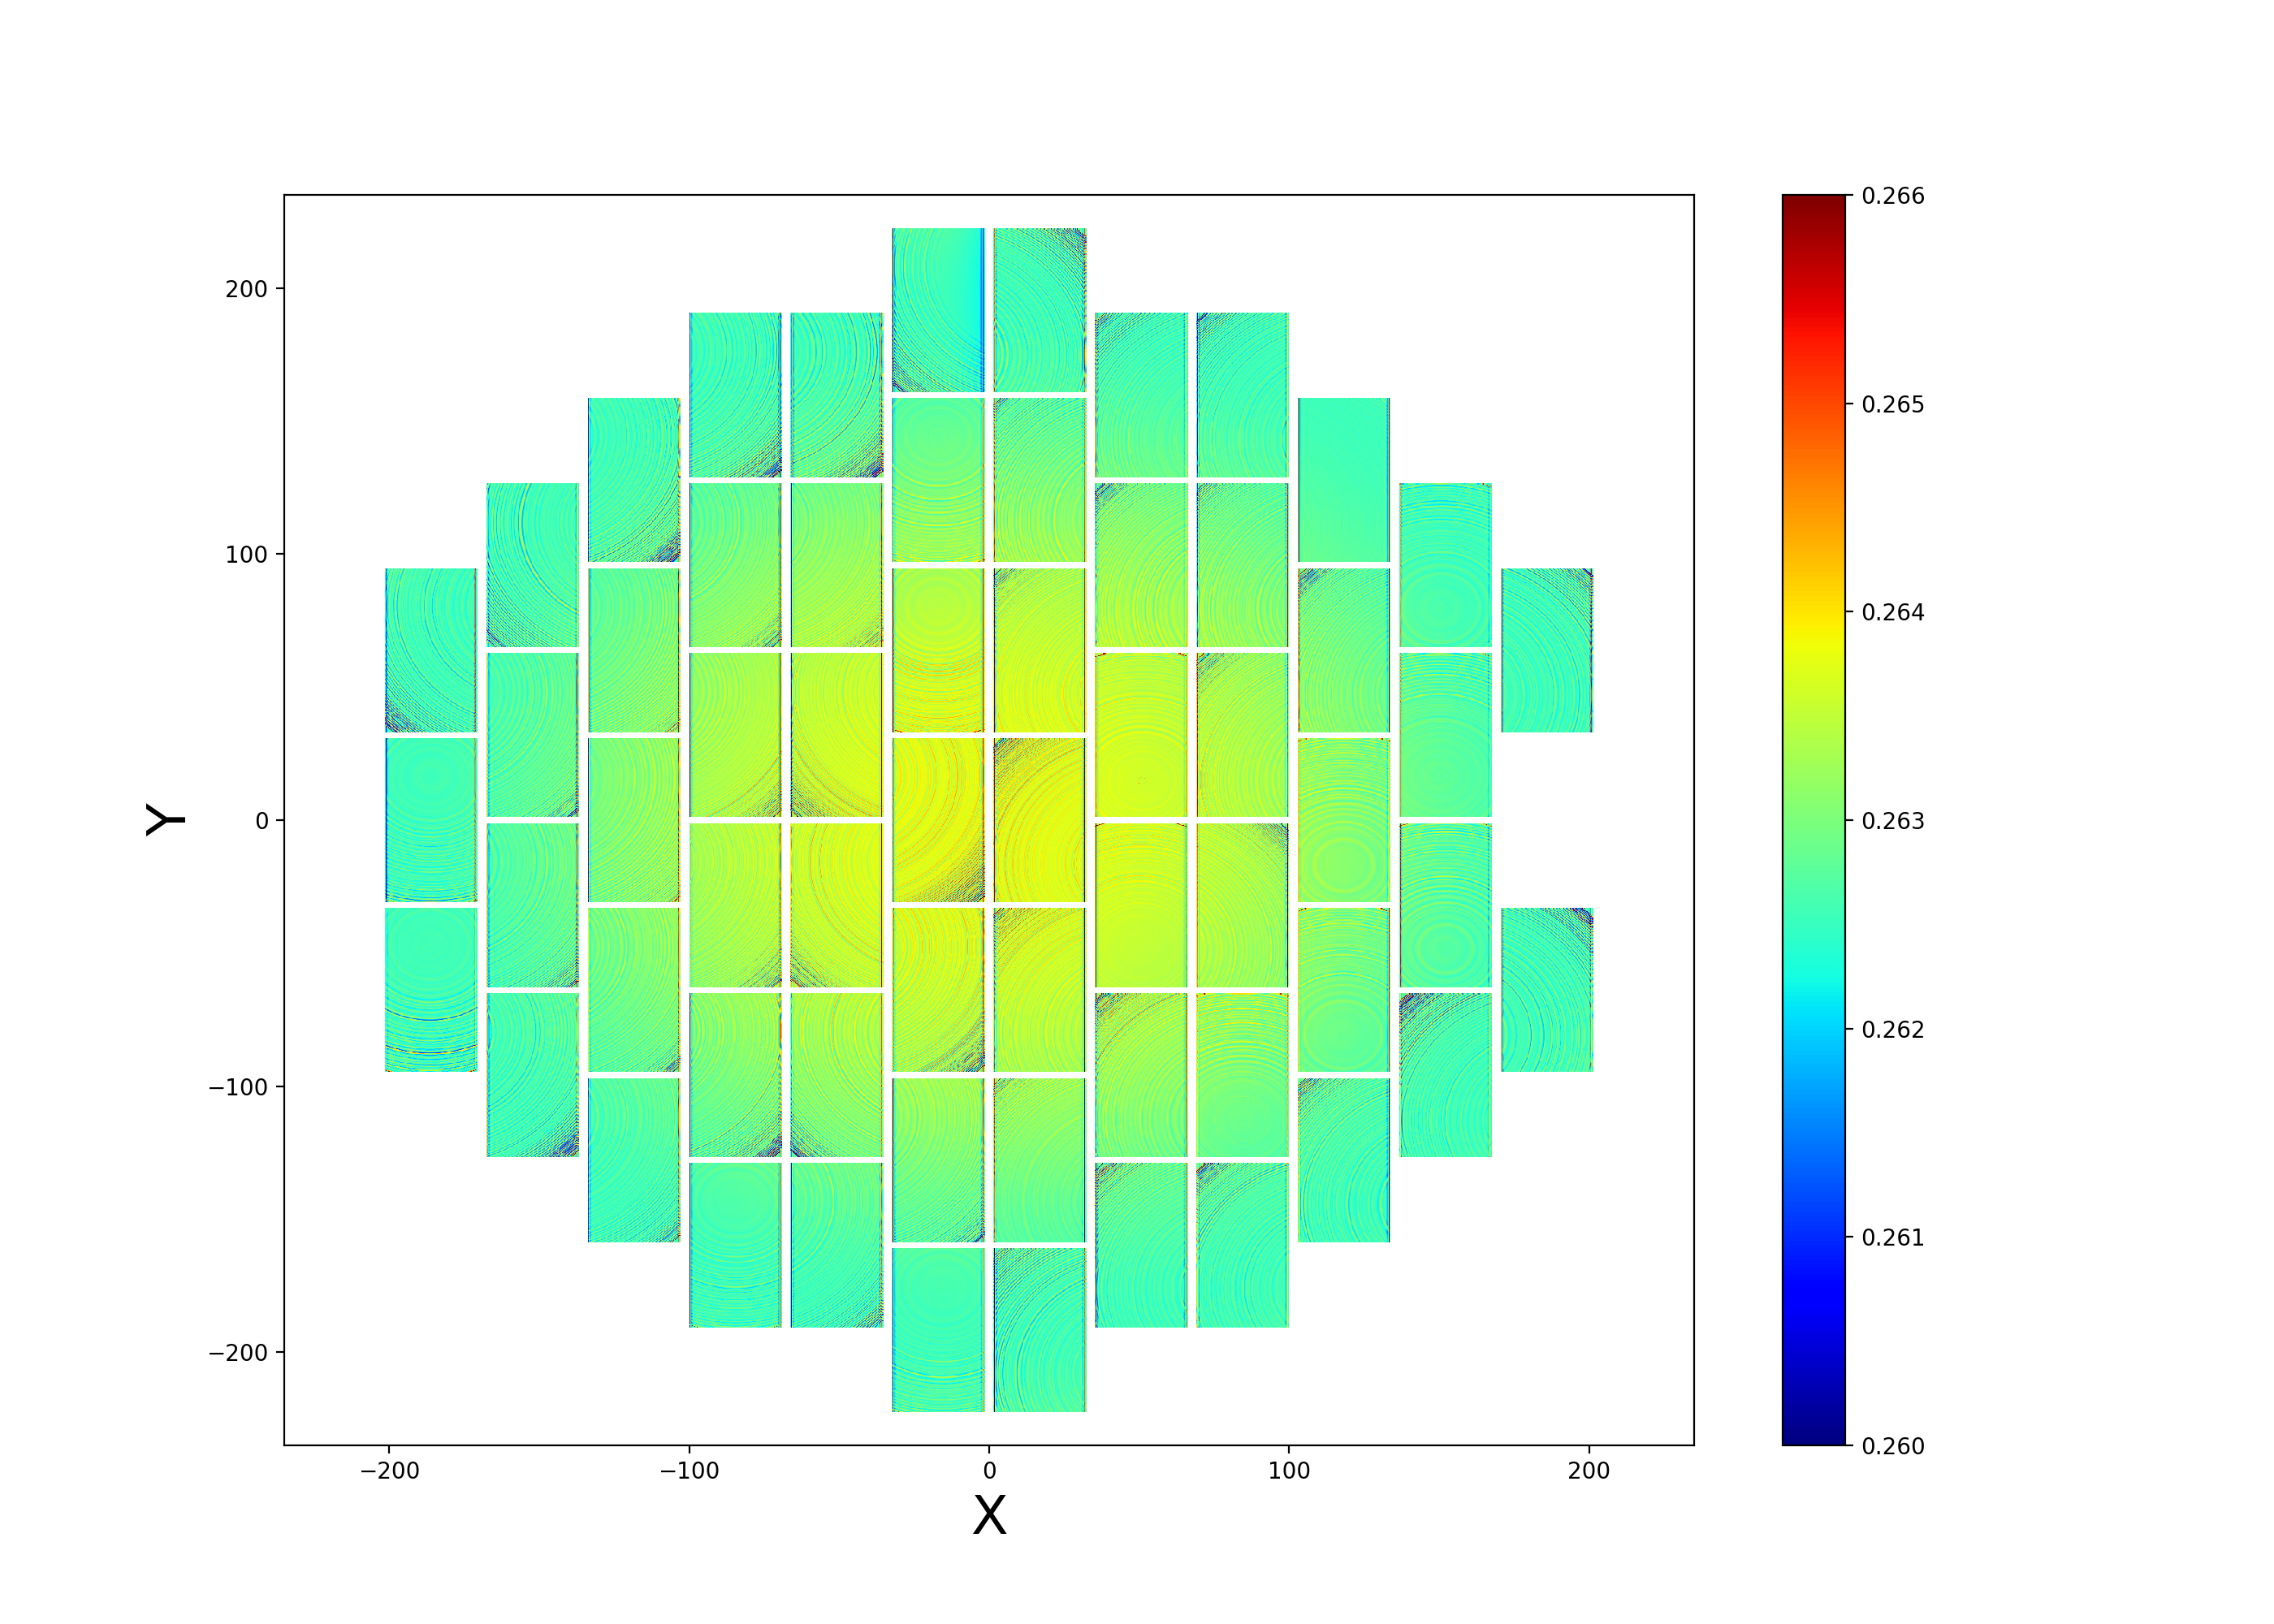

In [14]:
# plots
zmin = 0.26
zmax = 0.266
anorm = colors.Normalize(zmin,zmax,True)
cmap=cm.jet
f,ax = plt.subplots(1,1,figsize=(14,10))
    
# hard code X,Y limits to be DECam boundaries
minX = -235.
maxX = 235.
minY = -235.
maxY = 235.

for iCoord in PixelSize_all.keys():
    cset = ax.pcolormesh(X_all[iCoord], Y_all[iCoord], np.sqrt(PixelSize_all[iCoord]), cmap=cmap, norm=anorm)
    
ax.set_xlabel('X',fontsize=24)
ax.set_xlim(minX, maxX)
ax.set_ylabel('Y',fontsize=24)
ax.set_ylim(minY, maxY)

# add the colorbar
f.colorbar(cset,ax=ax)